In [1]:
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import acquire
import prepare

from env import user, password, host


/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Exercises

Do your work for this exercise in a file named explore.

### 1). Spam Data

- a. Load the spam data set.


In [2]:
def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df['text_cleaned_lem'] = df.text.apply(prepare.lemmatize)


In [4]:
# combine all messages in single string by label

ham_words = prepare.lemmatize(prepare.basic_clean(' '.join(df[df.label == 'ham'].text))).split()
spam_words = prepare.lemmatize(prepare.basic_clean(' '.join(df[df.label == 'spam'].text))).split()
all_words = prepare.lemmatize(prepare.basic_clean(' '.join(df.text))).split()

In [5]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [11]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,ham,spam
',6,6,0
'',15,15,0
''ok'',5,5,0
'an,1,1,0
'anything',1,1,0


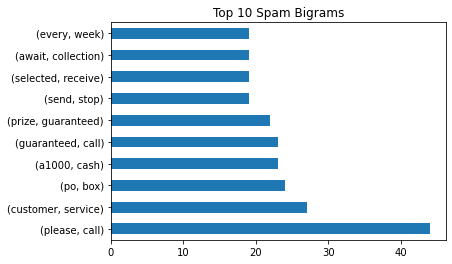

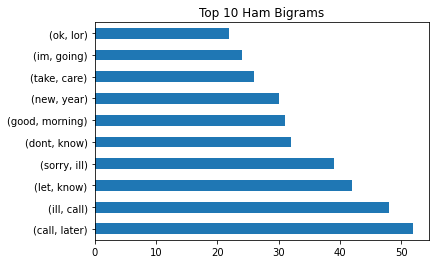

In [12]:
pd.Series(nltk.bigrams(spam_words)).value_counts().head(10).plot.barh()
plt.title("Top 10 Spam Bigrams")
plt.show()
pd.Series(nltk.bigrams(ham_words)).value_counts().head(10).plot.barh()
plt.title("Top 10 Ham Bigrams")
plt.show()

- b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?


- c. Is there any overlap in the bigrams for the spam data and the ham data?
- d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

2.Explore the blog articles using the techniques discussed in the exploration lesson.

3.Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.